## Imports

In [1]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess

## Profiling with cProfile

### cProfile

In [3]:
! python -m cProfile -s cumulative sph.py

         1688971 function calls (1655410 primitive calls) in 15.651 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   1027/1    0.005    0.000   15.652   15.652 {built-in method builtins.exec}
        1    0.000    0.000   15.652   15.652 sph.py:1(<module>)
        1    0.638    0.638   15.049   15.049 sph.py:154(main)
      301    1.562    0.005   10.153    0.034 sph.py:110(getAcc)
      601    0.407    0.001    7.982    0.013 sph.py:77(getDensity)
      601    5.253    0.009    5.253    0.009 sph.py:12(W)
      301    3.322    0.011    3.322    0.011 sph.py:28(gradW)
      902    3.061    0.003    3.063    0.003 sph.py:48(getPairwiseSeparations)
      123    0.002    0.000    1.878    0.015 __init__.py:1(<module>)
   1131/4    0.003    0.000    0.850    0.212 <frozen importlib._bootstrap>:1165(_find_and_load)
   1126/4    0.003    0.000    0.850    0.212 <frozen importlib._bootstrap>:1120(_find_and_load_unlocked)
   10

In [4]:
! python -m cProfile -o profile.stats sph.py

### snakeviz

In [5]:
! python -m snakeviz profile.stats --server

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2FUsers%2Fcarlottaholzle%2FDesktop%2FKTH%20Assignments%2FComputational-Astrophysics%2Fprofile.stats
^C


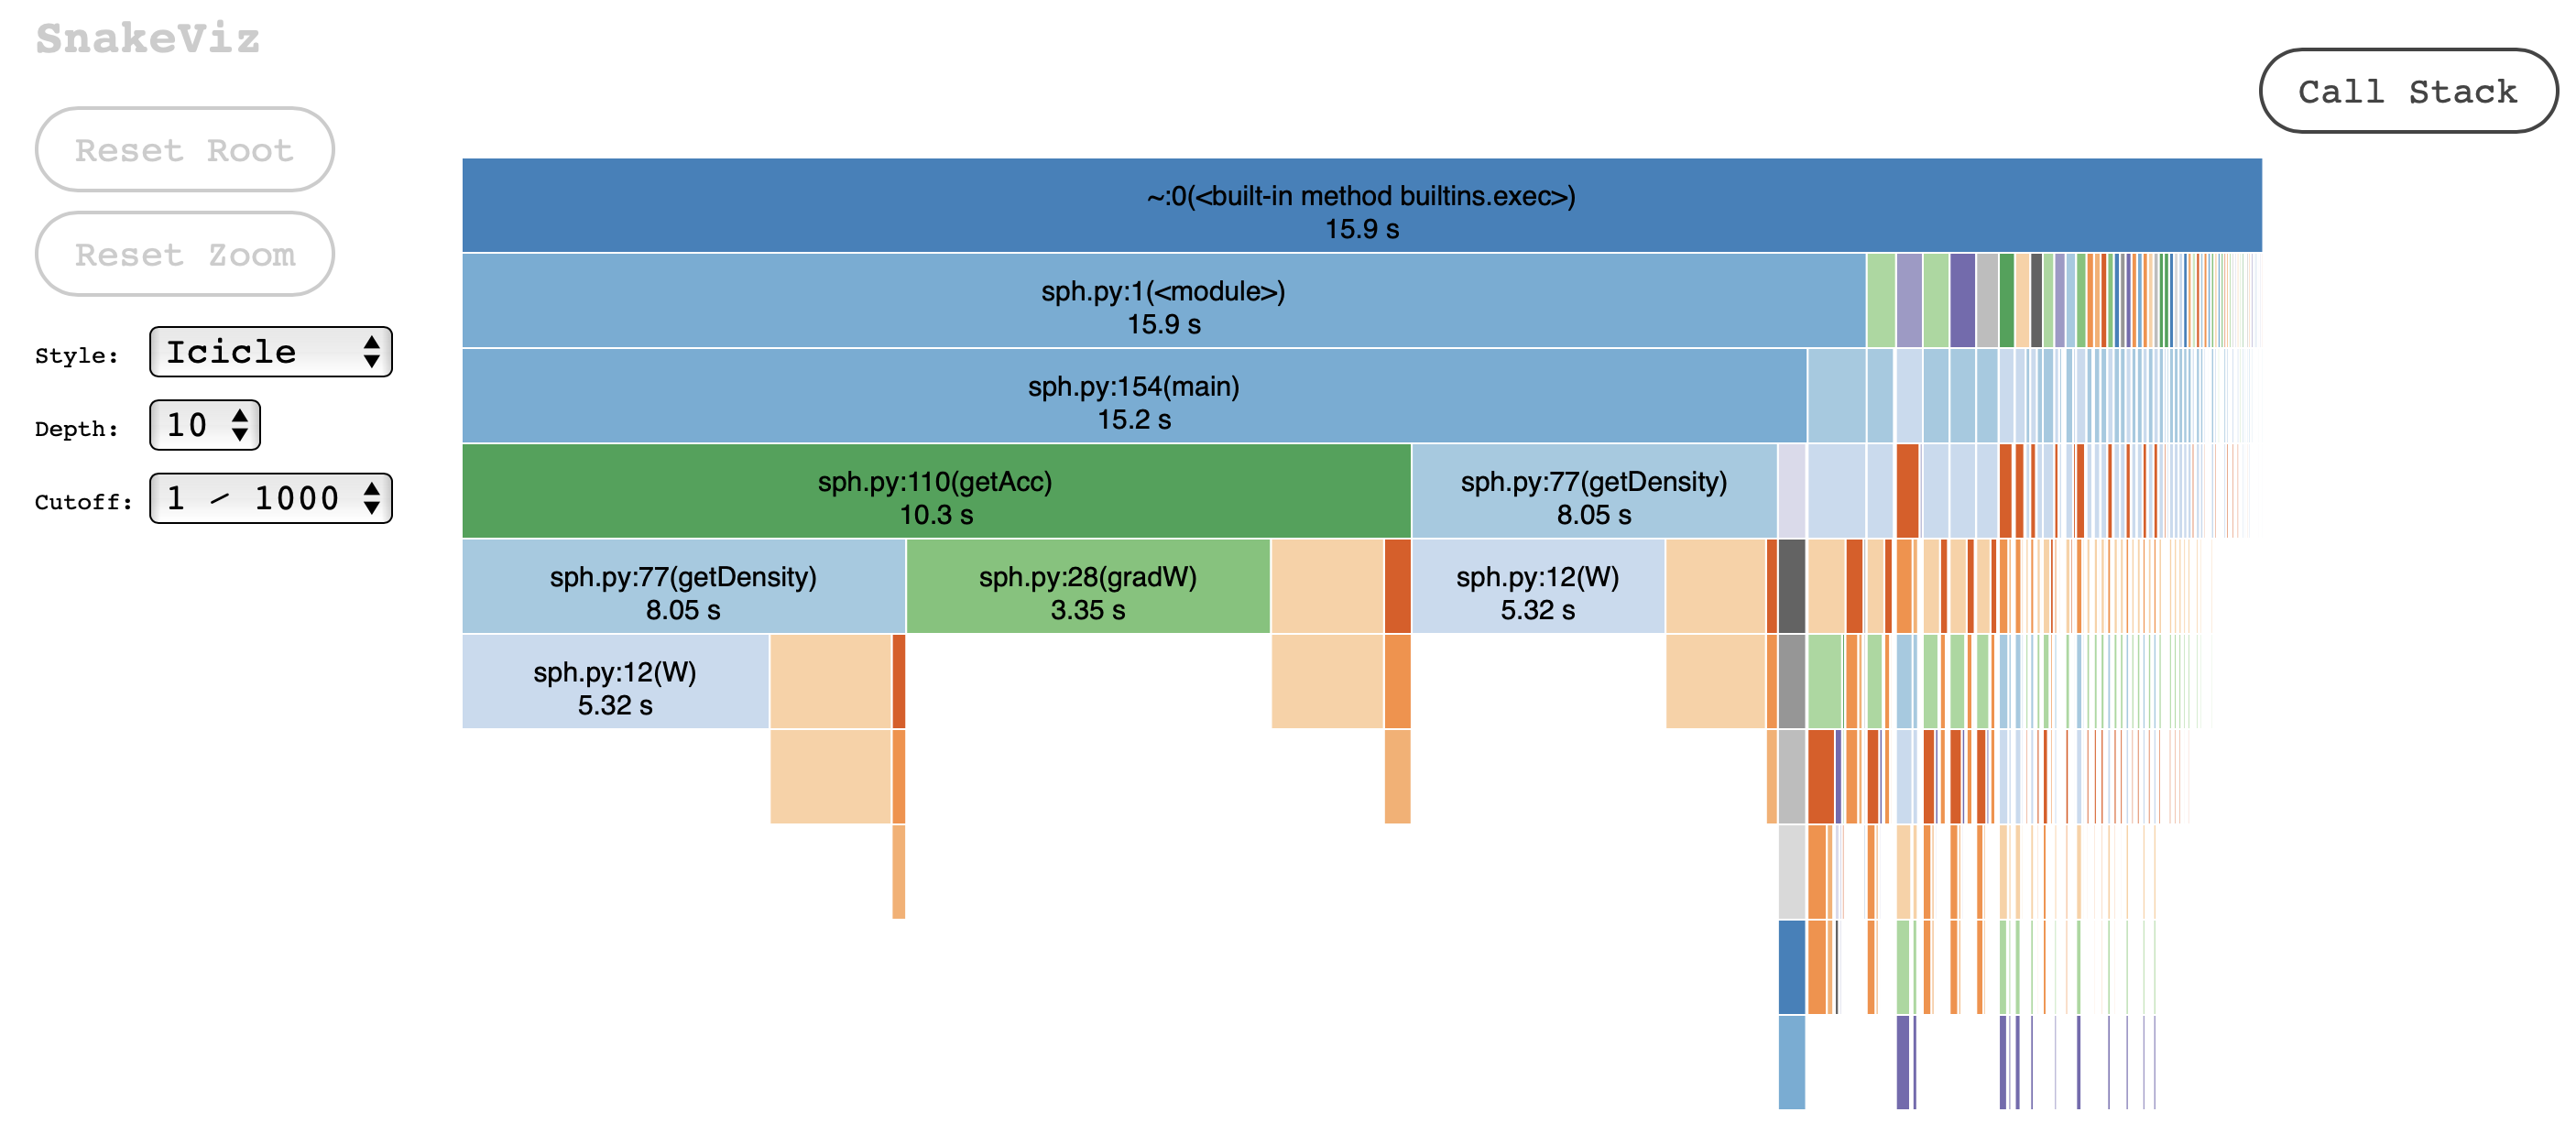

## Profiling with memory_profile

In [11]:
! python -m memory_profiler sph.py

Filename: sph.py

Line #    Mem usage    Increment  Occurrences   Line Contents
   109  419.828 MiB -1019.172 MiB         301   @profile
   110                                         def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   111                                         	"""
   112                                         	Calculate the acceleration on each SPH particle
   113                                         	pos   is an N x 3 matrix of positions
   114                                         	vel   is an N x 3 matrix of velocities
   115                                         	m     is the particle mass
   116                                         	h     is the smoothing length
   117                                         	k     equation of state constant
   118                                         	n     polytropic index
   119                                         	lmbda external force constant
   120                                         	nu    viscosity
 

In [12]:
! python -m mprof run sph.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


In [18]:
! python -m mprof plot mprofile_20250306080819.dat --output memory_plot1.png

In [19]:
! python -m mprof plot mprofile_20250306080638.dat --output memory_plot2.png

Memory plot sph.py: 


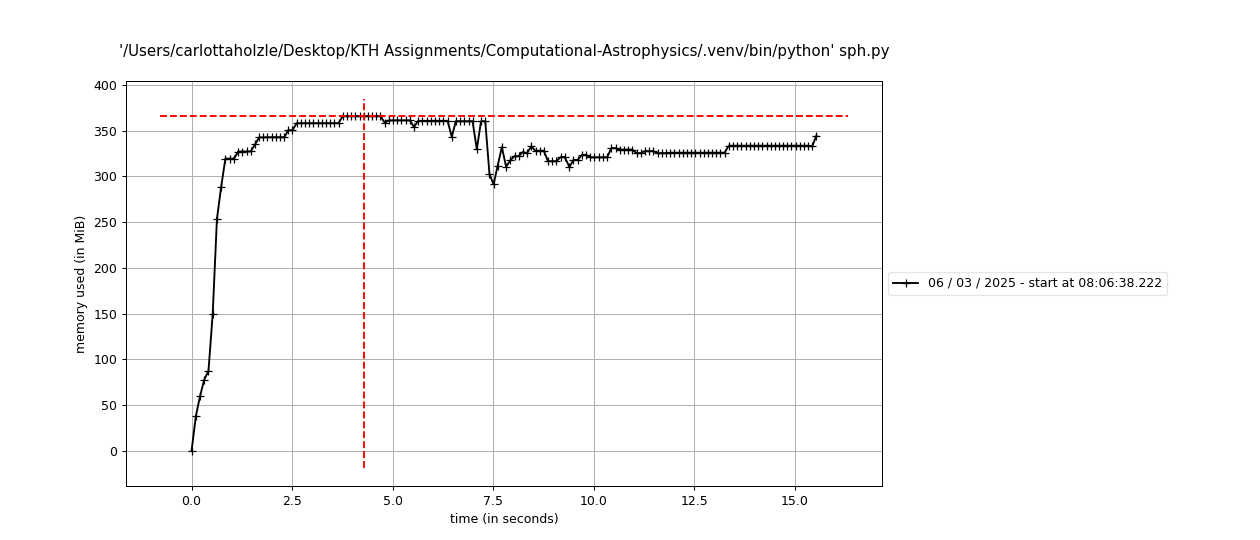

Memory plot getAcc: 

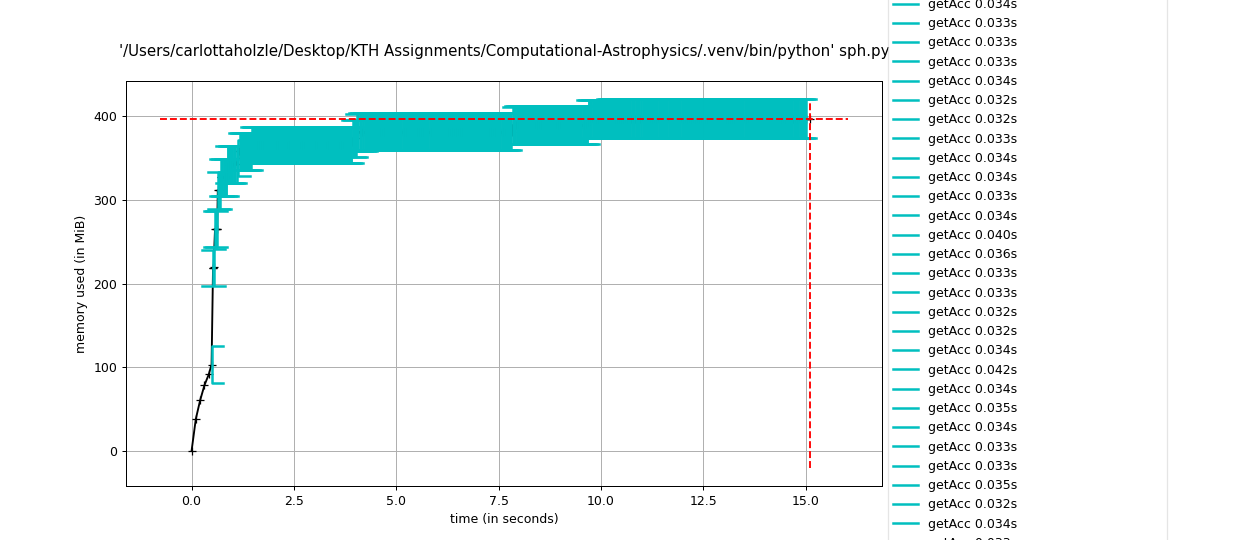

## Profiling with line_profiler

In [20]:
! python -m kernprof -l sph.py

Wrote profile results to sph.py.lprof
Inspect results with:
python -m line_profiler -rmt "sph.py.lprof"


In [21]:
! python -m line_profiler -rmt "sph.py.lprof"

Timer unit: 1e-06 s

Total time: 10.2558 s
File: sph.py
Function: getAcc at line 109

Line #      Hits         Time  Per Hit   % Time  Line Contents
   109                                           @profile
   110                                           def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   111                                           	"""
   112                                           	Calculate the acceleration on each SPH particle
   113                                           	pos   is an N x 3 matrix of positions
   114                                           	vel   is an N x 3 matrix of velocities
   115                                           	m     is the particle mass
   116                                           	h     is the smoothing length
   117                                           	k     equation of state constant
   118                                           	n     polytropic index
   119                                           	lmbda

# Results

## Results N = 1000 
Method: W, Self-Time: 5.199s, Percentage: 33.73%
Method: gradW, Self-Time: 3.295s, Percentage: 21.38%
Method: getPairwiseSeparations, Self-Time: 3.054s, Percentage: 19.81%
Method: getAcc, Self-Time: 1.556s, Percentage: 10.09%
Method: getDensity, Self-Time: 0.382s, Percentage: 2.48%

## Results N = 10000
Method: W, Self-Time: 699.920s, Percentage: 40.64%
Method: gradW, Self-Time: 465.638s, Percentage: 27.04%
Method: getPairwiseSeparations, Self-Time: 249.328s, Percentage: 14.48%
Method: getAcc, Self-Time: 197.522s, Percentage: 11.47%
Method: getDensity, Self-Time: 56.521s, Percentage: 3.28%

## Results getAcc line-profiling
The most expensive operation is the density calculation (getDensity), it consums 41.5% of the time.	The inefficiency arises from the pairwise computations involved in getPairwiseSeparations and kernel evaluations. 
The kernel gradient calculation (gradW) is with 32.8% of the total time the second most time consuming operation. The three np.sum calls contribute about 15% of the time. As these calculations are repetitive they should be streamlined.